# Unsmoothing Method - AR

This notebook would use Li2CO3 data from investing.com (which totally have data from 2018 to 2023) and the unit is CNY/TON. 

In [10]:
import warnings 
warnings.filterwarnings('ignore')
from utils.utils import transform_data, plot_correlogram, get_stock_data
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
import statsmodels.tsa.arima.model as tsa

In [3]:
li2co3 = transform_data("../data/Lithium Carbonate 99%Min China Spot Historical Data.csv")

         Date       Price        Open        High         Low  Vol. Change %
0  10/27/2023  155,500.00  155,500.00  158,000.00  153,000.00   NaN   -1.27%
1  10/26/2023  157,500.00  157,500.00  160,000.00  155,000.00   NaN   -1.25%
2  10/25/2023  159,500.00  159,500.00  162,000.00  157,000.00   NaN    1.27%
3  10/24/2023  157,500.00  157,500.00  160,000.00  155,000.00   NaN   -0.63%
4  10/23/2023  158,500.00  158,500.00  161,000.00  156,000.00   NaN   -2.46%


Please enter the column names, separated by a comma:  Date, Price, 1,2,3,4,5


<AxesSubplot: xlabel='Date'>

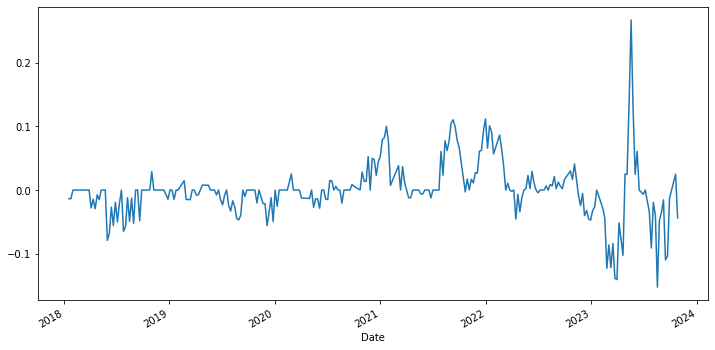

In [4]:
# Specify the size of the figure
plt.figure(figsize=(12, 6))
li2co3.Log_Return.plot()

In [5]:
# ro is observed data
ro = li2co3[li2co3.index > '2018-05-26'].Log_Return

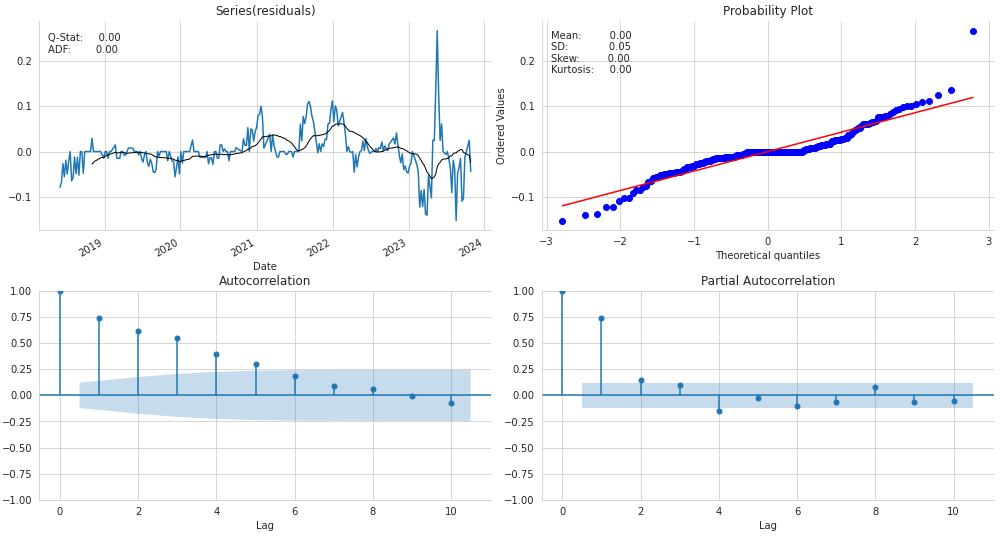

In [6]:
plot_correlogram(ro)

## Unsmoothing with Autoregressive Model: AR(1)

Given $$r_t = \mu + e_t \ \text{and}\  r_t^o = (1-\theta) r_t + \theta r_{t-1}^o $$
where $r^o$ is observed data

We have $$ r_t = \mu + \theta (r_{t-1}^o - \mu) + (1-\theta) e_t$$

Run regression on $$ \hat{r}_t^o = a + b\hat{r}_{t-1}^o + \epsilon_t$$
Then $$ \hat{\theta} = \hat{b},\ \hat{\mu} = \frac{\hat{a}}{1-\hat{b}}, \ \hat{e}_t = \frac{\hat{\epsilon}_t}{1-\hat{b}} $$
Thus $$ \hat{r}_t = \hat{\mu} + \hat{e}_t $$

## AR(p = 1) 

In [44]:
# ro_stationary 

AR_1_result = tsa.ARIMA(ro,order=(1,0,0)).fit()
a, b, std = MA_1_result.params
theta = b 
mu = a/(1-b)
et = AR_1_result.resid/(1-b)
fitted = mu + et

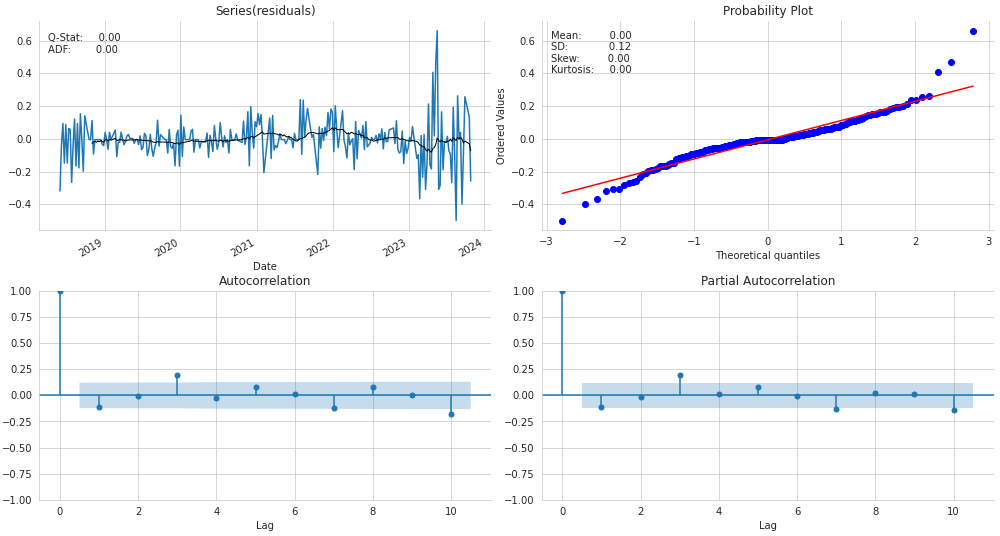

In [45]:
plot_correlogram(fitted)

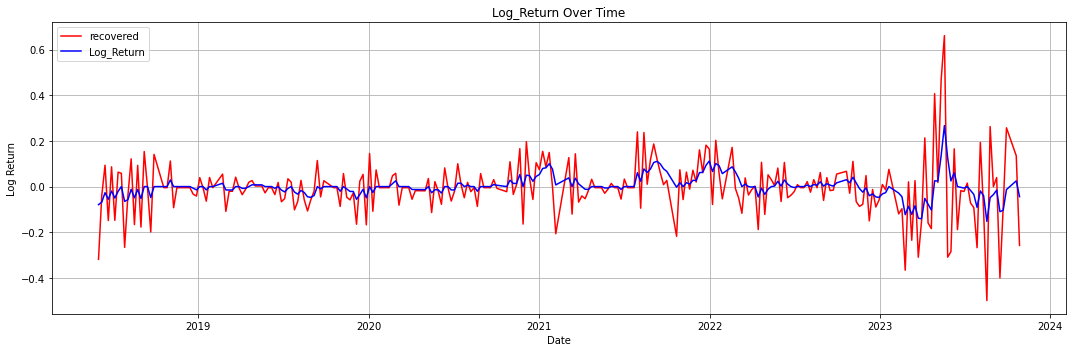

In [52]:
# plot fitted and original one: 

# Separate plot for 'Log_Return' for clarity and because it might be on a different scale
plt.figure(figsize=(15, 5))
plt.plot(ro.index, fitted, label="recovered", color="red")
plt.plot(ro.index, ro, label="Log_Return", color="blue")
plt.title("Log_Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## AR(p = 2) 

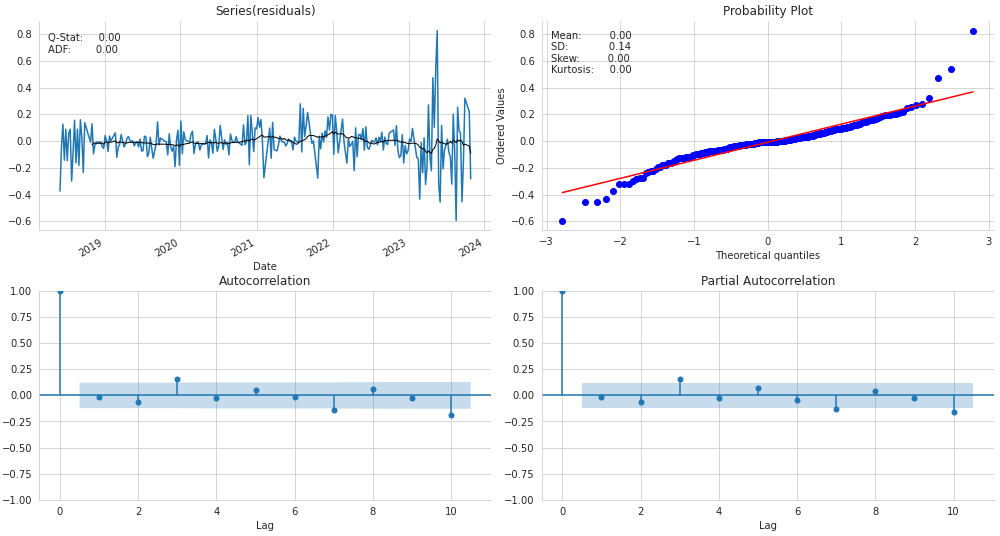

In [58]:
# ro_stationary 

AR_2_result = tsa.ARIMA(ro,order=(2,0,0)).fit()
a, b1, b2, std = AR_2_result.params
theta = b 
mu = a/(1-b1-b2)
et = AR_2_result.resid/(1-b1-b2)
fitted_2 = mu + et
plot_correlogram(fitted_2)

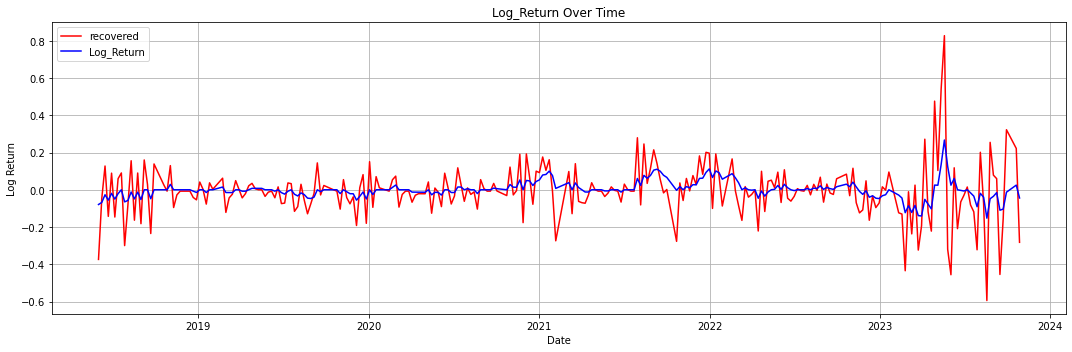

In [57]:
# plot fitted and original one: 

# Separate plot for 'Log_Return' for clarity and because it might be on a different scale
plt.figure(figsize=(15, 5))
plt.plot(ro.index, fitted_2, label="recovered", color="red")
plt.plot(ro.index, ro, label="Log_Return", color="blue")
plt.title("Log_Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## AR(p=3)

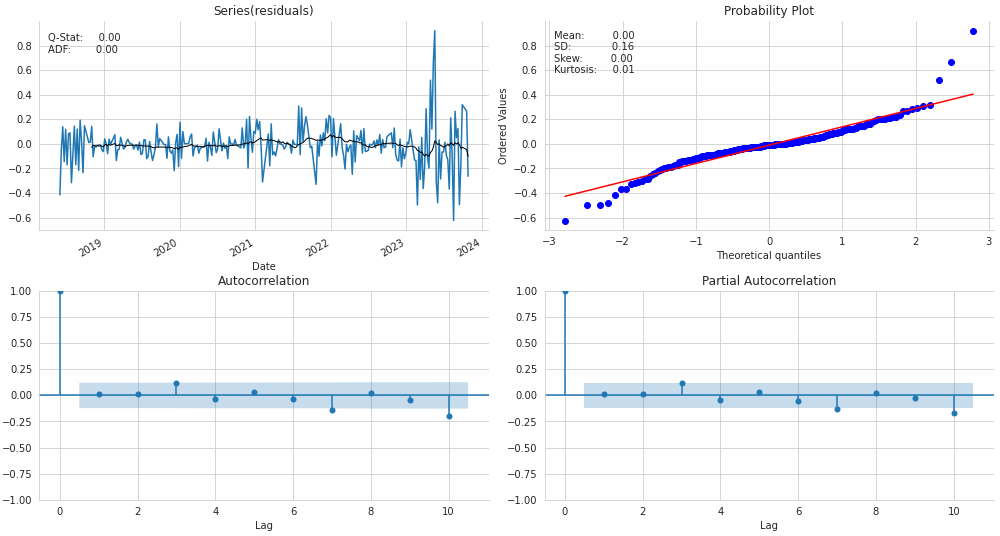

In [60]:
# ro_stationary 

AR_3_result = tsa.ARIMA(ro,order=(3,0,0)).fit()
a, b1, b2, b3, std = AR_3_result.params
mu = a/(1-b1-b2-b3)
et = AR_3_result.resid/(1-b1-b2-b3)
fitted_3 = mu + et
plot_correlogram(fitted_3)

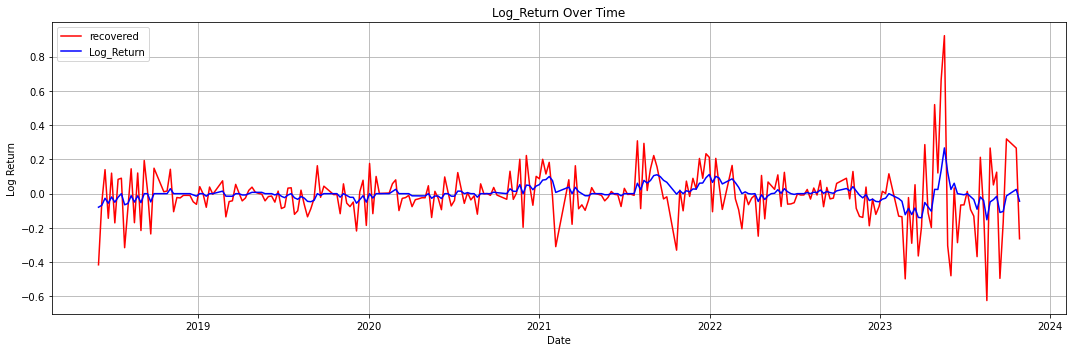

In [61]:
# plot fitted and original one: 

# Separate plot for 'Log_Return' for clarity and because it might be on a different scale
plt.figure(figsize=(15, 5))
plt.plot(ro.index, fitted_3, label="recovered", color="red")
plt.plot(ro.index, ro, label="Log_Return", color="blue")
plt.title("Log_Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()